## Sobrevivência empresarial em Pernambuco com base no PIB e nos dados abertos da RFB: uma análise em dois períodos sociopolítico econômicos da história do Brasil

#Elisângela P.M. Santana¹, Edivaldo R.S. Júnior², Cleide Lins de Almeida³


## SCRIPT 04 - ANALISE


In [ ]:
# bibliotecas para análise de dados e para visualização
import numpy as np
import pandas as pd
import xlrd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import xlrd
%matplotlib inline
# configurando variáveis do ambiente
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
#Montar drive virtual
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importar Dataset Final do SCRIPT 03
df_FinalPe=pd.read_csv('/content/drive/MyDrive/FURG-TCC/TCC - DADOS E ANALISE/DADOS/FINAL/df_PeFinal.csv', sep=',', encoding='UTF-8')
df_FinalPe.head(2)

,NOME,MUNICIPIO,UF,DESC_NATJU,NATJU,PORTE,IDE_MAT_FIL,SIT_CADASTRAL,MOT_SIT_CADAS,ANO_SIT_CADAS,ANO_INI_ATV,CNAE_FISCAL,N_MUNIC,DESC_CNAE,LATITUDE,LONGITUDE
0,GARANHUNS,2606002,PE,Empresário (Individual),2135,1.0000,1,ATIVA,0,2021,2021,4530705,2419,Comércio a varejo de pneumáticos e câmaras-de-ar,"-8,89","-36,493"
1,GARANHUNS,2606002,PE,Empresário (Individual),2135,1.0000,1,ATIVA,0,2022,2022,4530705,2419,Comércio a varejo de pneumáticos e câmaras-de-ar,"-8,89","-36,493"


In [ ]:
#Visualizar estrutura da Tabela empresas PE
df_FinalPe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984085 entries, 0 to 984084
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   NOME           984085 non-null  object 
 1   MUNICIPIO      984085 non-null  int64  
 2   UF             984085 non-null  object 
 3   DESC_NATJU     984085 non-null  object 
 4   NATJU          984085 non-null  int64  
 5   PORTE          984084 non-null  float64
 6   IDE_MAT_FIL    984085 non-null  int64  
 7   SIT_CADASTRAL  984085 non-null  object 
 8   MOT_SIT_CADAS  984085 non-null  int64  
 9   ANO_SIT_CADAS  984085 non-null  int64  
 10  ANO_INI_ATV    984085 non-null  int64  
 11  CNAE_FISCAL    984085 non-null  int64  
 12  N_MUNIC        984085 non-null  int64  
 13  DESC_CNAE      984085 non-null  object 
 14  LATITUDE       984085 non-null  object 
 15  LONGITUDE      984085 non-null  object 
dtypes: float64(1), int64(8), object(7)
memory usage: 120.1+ MB


In [ ]:
#Importar TABELA PIB tratada no excel 
PibBrasil = pd.read_excel('/content/drive/MyDrive/FURG-TCC/TCC - DADOS E ANALISE/DADOS/PIB_Anual_Var_Taxa_Sobrev - Copia.xlsx')
PibBrasil.head(5)

,ANO,Taxa_PIB_Brasil(%),TOT_EMP,TOT_ATIV,Taxa_Sobrev(%)
0,1967.0000,4.2000,1329,110.0000,8.2769
1,1968.0000,9.8000,1083,173.0000,15.9741
2,1969.0000,9.5000,1493,193.0000,12.9270
3,1970.0000,10.4000,1178,216.0000,18.3362
4,1971.0000,11.3400,1753,208.0000,11.8654


In [ ]:
#Visualizar estrutura da Tabela Pib Brasil
PibBrasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ANO                 51 non-null     float64
 1   Taxa_PIB_Brasil(%)  51 non-null     float64
 2   TOT_EMP             52 non-null     int64  
 3   TOT_ATIV            51 non-null     float64
 4   Taxa_Sobrev(%)      51 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.2 KB


In [ ]:
#Excluir coluna Vazia 
PibBrasil = PibBrasil.dropna()

In [ ]:
#Mudar tipo Variavel ANO para inteiro
PibBrasil['ANO'] = PibBrasil['ANO'].astype('int')

In [ ]:
#Criar dataset de analise do PIB por periodo 01
per_01 = PibBrasil[PibBrasil['ANO'] <= 1987]
per_01.head(24)

,ANO,Taxa_PIB_Brasil(%),TOT_EMP,TOT_ATIV,Taxa_Sobrev(%)
0,1967,4.2000,1329,110.0000,8.2769
1,1968,9.8000,1083,173.0000,15.9741
2,1969,9.5000,1493,193.0000,12.9270
3,1970,10.4000,1178,216.0000,18.3362
4,1971,11.3400,1753,208.0000,11.8654
5,1972,11.9400,1840,205.0000,11.1413
6,1973,13.9700,2211,258.0000,11.6689
7,1974,8.1500,2475,311.0000,12.5657
8,1975,5.1700,2944,242.0000,8.2201
9,1976,10.2600,3111,330.0000,10.6075


In [ ]:
#Conhecer as ESTATISTISCAS do dataset PIB periodo 01 - Taxa do PIB
print(statistics.mean(per_01['Taxa_PIB_Brasil(%)']))
print(statistics.stdev(per_01['Taxa_PIB_Brasil(%)']))
print(statistics.variance(per_01['Taxa_PIB_Brasil(%)']))
print(per_01['Taxa_PIB_Brasil(%)'].sum())

6.597142857142857
4.633772915084578
21.47185142857143
138.54000000000002


In [ ]:
#Conhecer as ESTATISTISCAS do dataset PIB periodo 01 - Taxa de Sobrevivencia
print(statistics.mean(per_01['Taxa_Sobrev(%)']))
print(statistics.stdev(per_01['Taxa_Sobrev(%)']))
print(statistics.variance(per_01['Taxa_Sobrev(%)']))
print(per_01['Taxa_Sobrev(%)'].sum())

10.731938903268585
2.7690742669130173
7.667772295679863
225.3707169686403


In [ ]:
#Conhecer as ESTATISTISCAS do dataset PIB periodo 01
per_01.describe()

,ANO,Taxa_PIB_Brasil(%),TOT_EMP,TOT_ATIV,Taxa_Sobrev(%)
count,21.0000,21.0000,21.0000,21.0000,21.0000
mean,1977.0000,6.5971,4831.6190,461.1905,10.7319
std,6.2048,4.6338,3700.1422,283.3935,2.7691
min,1967.0000,-4.2500,1083.0000,110.0000,6.4906
25%,1972.0000,4.9300,1840.0000,216.0000,9.2541
50%,1977.0000,7.4900,4283.0000,381.0000,10.6075
75%,1982.0000,9.8000,6243.0000,665.0000,11.8614
max,1987.0000,13.9700,14337.0000,1065.0000,18.3362


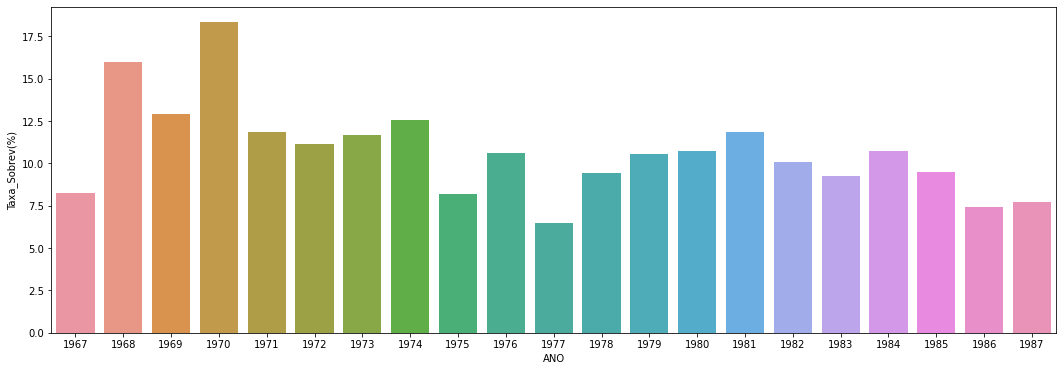

In [ ]:
#Visualizar Taxa de Sobrevivencia Período 01
plt.figure(figsize=(18,6))
sns.barplot(data=per_01, x='ANO', y='Taxa_Sobrev(%)')

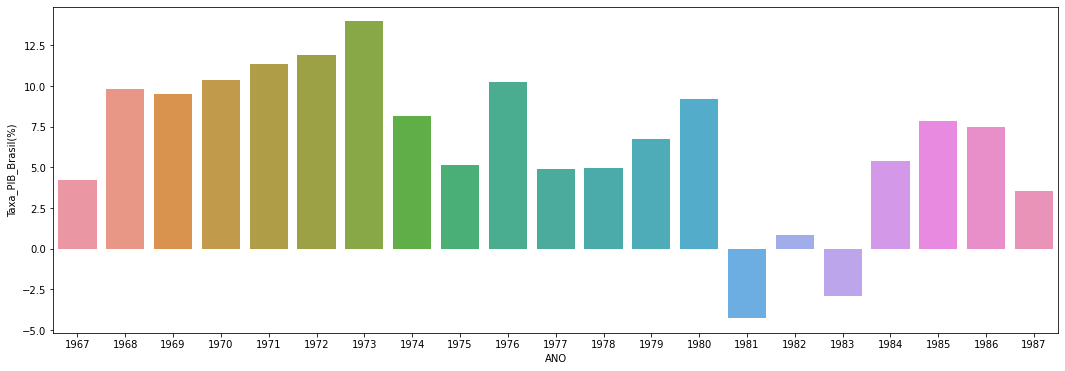

In [ ]:
#Visualizar Taxa de PIB Período 01
plt.figure(figsize=(18,6))
sns.barplot(data=per_01, x='ANO', y='Taxa_PIB_Brasil(%)')

In [ ]:
#Criar dataset de analise do PIB por periodo 02
per_02 = PibBrasil[PibBrasil['ANO'] >= 1994]
per_02.head(24)

,ANO,Taxa_PIB_Brasil(%),TOT_EMP,TOT_ATIV,Taxa_Sobrev(%)
27,1994,5.8500,17416,2330.0000,13.3785
28,1995,4.2200,19832,2730.0000,13.7656
29,1996,2.2100,20204,2893.0000,14.3189
30,1997,3.3900,21015,3925.0000,18.6771
31,1998,0.3400,18909,3193.0000,16.8861
32,1999,0.4700,20217,4586.0000,22.6839
33,2000,4.3900,18010,3652.0000,20.2776
34,2001,1.3900,17751,3815.0000,21.4917
35,2002,3.0500,15928,3558.0000,22.3380
36,2003,1.1400,14969,3355.0000,22.4130


In [ ]:
#Conhecer as ESTATISTISCAS do dataset PIB periodo 02
per_02.describe()

,ANO,Taxa_PIB_Brasil(%),TOT_EMP,TOT_ATIV,Taxa_Sobrev(%)
count,24.0000,24.0000,24.0000,24.0000,24.0000
mean,2005.5000,2.5754,26400.9583,5893.1250,21.8768
std,7.0711,2.7484,11575.9355,3124.7303,5.4810
min,1994.0000,-3.5500,14754.0000,2161.0000,13.3785
25%,1999.7500,0.9800,17848.5000,3507.2500,19.3683
50%,2005.5000,3.0250,20330.0000,4501.0000,20.9928
75%,2011.2500,4.2625,38937.5000,8784.5000,25.6146
max,2017.0000,7.5300,47387.0000,13204.0000,33.9269


In [ ]:
#Conhecer as ESTATISTISCAS do dataset PIB periodo 02 - Taxa do PIB
print(statistics.mean(per_02['Taxa_PIB_Brasil(%)']))
print(statistics.stdev(per_02['Taxa_PIB_Brasil(%)']))
print(statistics.variance(per_02['Taxa_PIB_Brasil(%)']))
print(per_02['Taxa_PIB_Brasil(%)'].sum())

2.5754166666666665
2.7483908005874316
7.553651992753624
61.809999999999995


In [ ]:
#Conhecer as ESTATISTISCAS do dataset PIB periodo 02 - Taxa de Sobrevivencia
print(statistics.mean(per_02['Taxa_Sobrev(%)']))
print(statistics.stdev(per_02['Taxa_Sobrev(%)']))
print(statistics.variance(per_02['Taxa_Sobrev(%)']))
print(per_02['Taxa_Sobrev(%)'].sum())

21.876783576837404
5.480956078334103
30.04087953262755
525.0428058440978


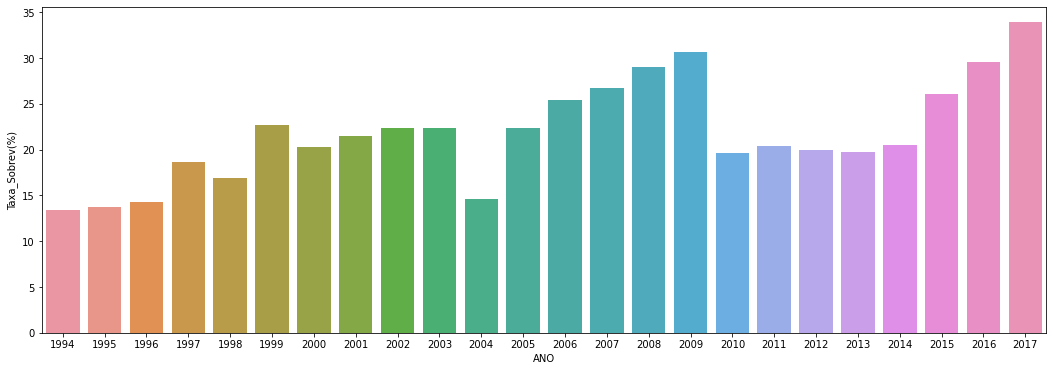

In [ ]:
#Visualizar Taxa de Sobrevivencia Período 02
plt.figure(figsize=(18,6))
sns.barplot(data=per_02, x='ANO', y='Taxa_Sobrev(%)')

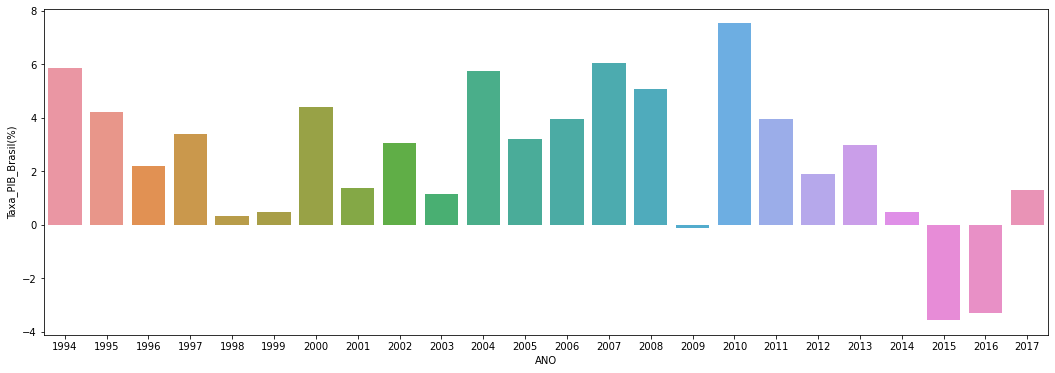

In [ ]:
#Visualizar Taxa de PIB Período 02
plt.figure(figsize=(18,6))
sns.barplot(data=per_02, x='ANO', y='Taxa_PIB_Brasil(%)')

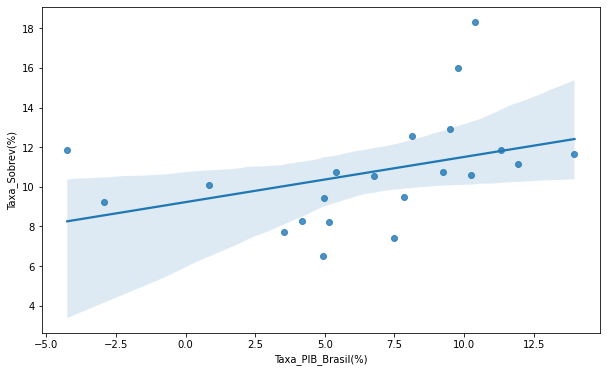

In [ ]:
#Visualizar Grafico de Dispersão entre Taxa PIB e Taxa Sobrevivencia Periodo 01
plt.figure(figsize=(10,6))
sns.regplot(x='Taxa_PIB_Brasil(%)', y='Taxa_Sobrev(%)', data=per_01)


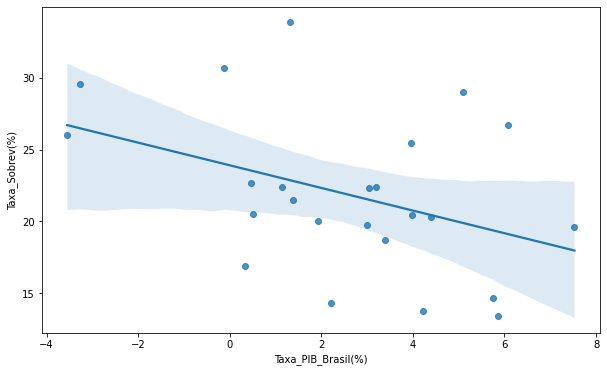

In [ ]:
#Visualizar Grafico de Dispersão entre Taxa PIB e Taxa Sobrevivencia Periodo 02
plt.figure(figsize=(10,6))
sns.regplot(x='Taxa_PIB_Brasil(%)', y='Taxa_Sobrev(%)', data=per_02)

In [ ]:
#Visualizar Correlações dataset PIB do Periodo 01
per_01.corr()

,ANO,Taxa_PIB_Brasil(%),TOT_EMP,TOT_ATIV,Taxa_Sobrev(%)
ANO,1.0000,-0.5019,0.9046,0.9554,-0.5396
Taxa_PIB_Brasil(%),-0.5019,1.0000,-0.4023,-0.4559,0.3811
TOT_EMP,0.9046,-0.4023,1.0000,0.9635,-0.5876
TOT_ATIV,0.9554,-0.4559,0.9635,1.0000,-0.4596
Taxa_Sobrev(%),-0.5396,0.3811,-0.5876,-0.4596,1.0000


In [ ]:
#Visualizar Correlações dataset PIB do Periodo 02
per_02.corr()

,ANO,Taxa_PIB_Brasil(%),TOT_EMP,TOT_ATIV,Taxa_Sobrev(%)
ANO,1.0000,-0.3487,0.7717,0.9151,0.6632
Taxa_PIB_Brasil(%),-0.3487,1.0000,-0.2245,-0.3991,-0.3956
TOT_EMP,0.7717,-0.2245,1.0000,0.8786,0.1932
TOT_ATIV,0.9151,-0.3991,0.8786,1.0000,0.6123
Taxa_Sobrev(%),0.6632,-0.3956,0.1932,0.6123,1.0000


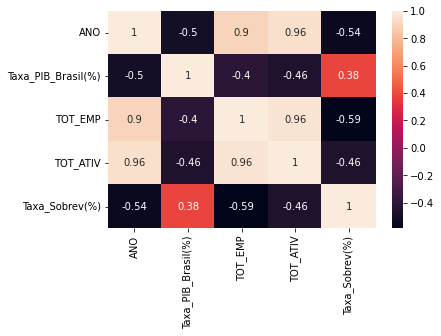

In [ ]:
#Plotar Correlações dataset PIB do Periodo 01
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(per_01)
sns.heatmap(per_01.corr(), annot=True)

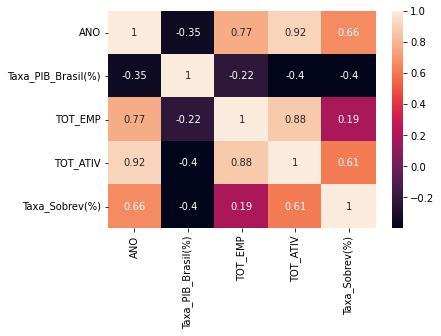

In [ ]:
#Plotar Correlações dataset PIB do Periodo 02
df = pd.DataFrame(per_02)
sns.heatmap(per_02.corr(), annot=True)

In [ ]:
#Selecionar Colunas de Trabalho do dataset df_FinalPE para Analise e Visualização dO DATASET empresas de PE
selec  = ['NOME','DESC_NATJU','PORTE','IDE_MAT_FIL','SIT_CADASTRAL','MOT_SIT_CADAS','ANO_INI_ATV',
       'CNAE_FISCAL','DESC_CNAE']
df_FinalPe2 = df_FinalPe.filter(items=selec)
df_FinalPe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984085 entries, 0 to 984084
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   NOME           984085 non-null  object 
 1   DESC_NATJU     984085 non-null  object 
 2   PORTE          984084 non-null  float64
 3   IDE_MAT_FIL    984085 non-null  int64  
 4   SIT_CADASTRAL  984085 non-null  object 
 5   MOT_SIT_CADAS  984085 non-null  int64  
 6   ANO_INI_ATV    984085 non-null  int64  
 7   CNAE_FISCAL    984085 non-null  int64  
 8   DESC_CNAE      984085 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 67.6+ MB


In [ ]:
#Visualizar dados tabela empresas PE (colunas selecionadas)
df_FinalPe2.head()

,NOME,DESC_NATJU,PORTE,IDE_MAT_FIL,SIT_CADASTRAL,MOT_SIT_CADAS,ANO_INI_ATV,CNAE_FISCAL,DESC_CNAE
0,GARANHUNS,Empresário (Individual),1.0000,1,ATIVA,0,2021,4530705,Comércio a varejo de pneumáticos e câmaras-de-ar
1,GARANHUNS,Empresário (Individual),1.0000,1,ATIVA,0,2022,4530705,Comércio a varejo de pneumáticos e câmaras-de-ar
2,GARANHUNS,Empresário (Individual),1.0000,1,INATIVA,1,1998,4530705,Comércio a varejo de pneumáticos e câmaras-de-ar
3,GARANHUNS,Empresário (Individual),1.0000,1,INATIVA,1,1999,4530705,Comércio a varejo de pneumáticos e câmaras-de-ar
4,GARANHUNS,Empresário (Individual),1.0000,1,INATIVA,63,2001,4530705,Comércio a varejo de pneumáticos e câmaras-de-ar


In [ ]:
#Visualizar dados da Variavel Ano
df_FinalPe2['ANO_INI_ATV'].unique()

array([2021, 2022, 1998, 1999, 2001, 2002, 2007, 2010, 2011, 2013, 2014,
       2015, 2016, 2017, 1993, 1994, 1995, 1996, 1997, 2006, 2000, 2004,
       2005, 1981, 1989, 1982, 1983, 1984, 1985, 1987, 1972, 1973, 1974,
       1969, 1970, 2008, 1986, 2009, 1978, 1980, 1988, 2012, 2019, 2018,
       1990, 2020, 1991, 1992, 2003, 1968, 1966, 1971, 1976, 1977, 1975,
       1979, 1967, 1965, 1932, 1934, 1935, 1928, 1962, 1964, 1957, 1955,
       1963, 1961, 1950, 1958, 1956, 1951, 1939, 1960, 1949, 1941, 1948,
       1954, 1943, 1945, 1959, 1953, 1914, 1952, 1901, 1947, 1904, 1920,
       1906, 1918, 1913, 1902, 1919, 1930, 1925, 1926, 1938, 1909, 1929,
       1915, 1908, 1922, 1912, 1905, 1921, 1946, 1917, 1942, 1931, 1936,
       1933, 1937])

In [ ]:
#Separar dados de empresas PE para Analise e Visualização dos dados - Periodo 01
df_Per01 = df_FinalPe2[df_FinalPe2['ANO_INI_ATV'] >= 1964]
df_Per01 = df_Per01[df_Per01['ANO_INI_ATV'] <= 1987]
df_Per01['ANO_INI_ATV'].unique()

array([1981, 1982, 1983, 1984, 1985, 1987, 1972, 1973, 1974, 1969, 1970,
       1986, 1978, 1980, 1968, 1966, 1971, 1976, 1977, 1975, 1979, 1967,
       1965, 1964])

In [ ]:
#Visualizar Situação cadastral x Ano Inicio da Atividade Período 01
pd.crosstab(df_Per01["ANO_INI_ATV"],df_Per01['SIT_CADASTRAL'])


SIT_CADASTRAL,ATIVA,INATIVA
ANO_INI_ATV,,
1964,15,3
1965,25,61
1966,421,2594
1967,110,1219
1968,173,910
1969,193,1300
1970,216,962
1971,208,1545
1972,205,1635


In [ ]:
#Visualizar Taxa de Sobrevivencia  x Ano Inicio da Atividade Período 01
sitcad = pd.crosstab(df_Per01["ANO_INI_ATV"],df_Per01['SIT_CADASTRAL'])
sitcad_per01 = sitcad['ATIVA'] / (sitcad['ATIVA'] + sitcad['INATIVA'])
sitcad_per01

ANO_INI_ATV
1964   0.8333
1965   0.2907
1966   0.1396
1967   0.0828
1968   0.1597
1969   0.1293
1970   0.1834
1971   0.1187
1972   0.1114
1973   0.1167
1974   0.1257
1975   0.0822
1976   0.1061
1977   0.0649
1978   0.0943
1979   0.1056
1980   0.1073
1981   0.1186
1982   0.1009
1983   0.0925
1984   0.1075
1985   0.0948
1986   0.0743
1987   0.0771
dtype: float64

In [ ]:
#Visualizar dados Tabela empresas PE periodo 01
df_Per01.head()

,NOME,DESC_NATJU,PORTE,IDE_MAT_FIL,SIT_CADASTRAL,MOT_SIT_CADAS,ANO_INI_ATV,CNAE_FISCAL,DESC_CNAE
79,GARANHUNS,Empresário (Individual),5.0000,1,INATIVA,1,1981,5611201,Restaurantes e similares
81,GARANHUNS,Empresário (Individual),1.0000,1,INATIVA,63,1981,5611201,Restaurantes e similares
82,GARANHUNS,Empresário (Individual),5.0000,1,INATIVA,1,1981,5611201,Restaurantes e similares
85,GARANHUNS,Empresário (Individual),5.0000,1,INATIVA,1,1982,5611201,Restaurantes e similares
86,GARANHUNS,Empresário (Individual),5.0000,1,INATIVA,1,1982,5611201,Restaurantes e similares


In [ ]:
#Visualizar estatisticas da Tabela empresas PE periodo 01
df_Per01.describe()

,PORTE,IDE_MAT_FIL,MOT_SIT_CADAS,ANO_INI_ATV,CNAE_FISCAL
count,104583.0000,104583.0000,104583.0000,104583.0000,104583.0000
mean,4.0806,1.0753,41.8554,1980.6424,5124466.3875
std,1.6658,0.2639,33.3505,5.7696,1731697.8145
min,1.0000,1.0000,0.0000,1964.0000,111301.0000
25%,5.0000,1.0000,1.0000,1977.0000,4711301.0000
50%,5.0000,1.0000,63.0000,1982.0000,4755501.0000
75%,5.0000,1.0000,71.0000,1986.0000,4789099.0000
max,5.0000,2.0000,74.0000,1987.0000,9900800.0000


In [ ]:
#Visualizar estatisticas da Tabela empresas PE periodo 01 por Ano de Inicio de Atividade
print(statistics.mean(df_Per01['ANO_INI_ATV'].value_counts()))
print(statistics.stdev(df_Per01['ANO_INI_ATV'].value_counts()))
print(statistics.variance(df_Per01['ANO_INI_ATV'].value_counts()))

4357.625
3714.9574029098617
13800908.505434783


In [ ]:
#Separar dados de empresas PE para Analise e Visualização dos dados - Periodo 02
df_Per02 = df_FinalPe2[df_FinalPe2['ANO_INI_ATV'] >= 1994]
df_Per02 = df_Per02[df_Per02['ANO_INI_ATV'] <= 2017]
df_Per02['ANO_INI_ATV'].unique()

array([1998, 1999, 2001, 2002, 2007, 2010, 2011, 2013, 2014, 2015, 2016,
       2017, 1994, 1995, 1996, 1997, 2006, 2000, 2004, 2005, 2008, 2009,
       2012, 2003])

In [ ]:
#Visualizar Situação cadastral x Ano Inicio da Atividade Periodo 02
pd.crosstab(df_Per02["ANO_INI_ATV"],df_Per02['SIT_CADASTRAL'])

SIT_CADASTRAL,ATIVA,INATIVA
ANO_INI_ATV,,
1994,2330,15086
1995,2730,17102
1996,2893,17311
1997,3925,17090
1998,3193,15716
1999,4586,15631
2000,3652,14358
2001,3815,13936
2002,3558,12370


In [ ]:
#Visualizar Taxa de Sobrevivencia  x Ano Inicio da Atividade Período 02
sitcad2 = pd.crosstab(df_Per02["ANO_INI_ATV"],df_Per02['SIT_CADASTRAL'])
sitcad_per02 = sitcad2['ATIVA'] / (sitcad2['ATIVA'] + sitcad2['INATIVA'])
sitcad_per02

ANO_INI_ATV
1994   0.1338
1995   0.1377
1996   0.1432
1997   0.1868
1998   0.1689
1999   0.2268
2000   0.2028
2001   0.2149
2002   0.2234
2003   0.2241
2004   0.1465
2005   0.2241
2006   0.2547
2007   0.2673
2008   0.2905
2009   0.3066
2010   0.1960
2011   0.2041
2012   0.2002
2013   0.1976
2014   0.2049
2015   0.2605
2016   0.2959
2017   0.3393
dtype: float64

In [ ]:
#Visualizar estatisticas da Tabela empresas PE periodo 02
df_Per02.describe()

,PORTE,IDE_MAT_FIL,MOT_SIT_CADAS,ANO_INI_ATV,CNAE_FISCAL
count,633623.0000,633623.0000,633623.0000,633623.0000,633623.0000
mean,2.0255,1.0756,26.8880,2007.7929,5492435.3091
std,1.6936,0.2643,31.8039,6.9428,2068588.4532
min,1.0000,1.0000,0.0000,1994.0000,111301.0000
25%,1.0000,1.0000,1.0000,2002.0000,4712100.0000
50%,1.0000,1.0000,1.0000,2010.0000,4781400.0000
75%,3.0000,1.0000,63.0000,2013.0000,6810203.0000
max,5.0000,2.0000,74.0000,2017.0000,9900800.0000


In [ ]:
#Visualizar estatisticas da Tabela empresas PE periodo 02 por Ano de Inicio de Atividade
print(statistics.mean(df_Per02['ANO_INI_ATV'].value_counts()))
print(statistics.stdev(df_Per02['ANO_INI_ATV'].value_counts()))
print(statistics.variance(df_Per02['ANO_INI_ATV'].value_counts()))

26400.958333333332
11575.935486581322
134002282.38949275


In [ ]:
#Mudar Tipo da variavel Porte 
df_Per01['PORTE'] = df_Per01['PORTE'].astype('int')
df_Per02['PORTE'] = df_Per02['PORTE'].astype('int')

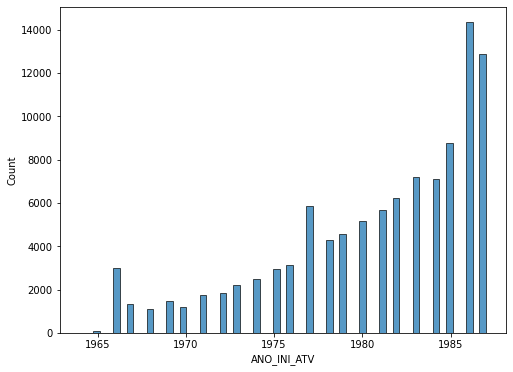

In [ ]:
#Visualizar Quantidade de Empresas Abertas Ano a Ano Periodo 01
plt.figure(figsize=(8,6))
sns.histplot(data=df_Per01, x='ANO_INI_ATV')


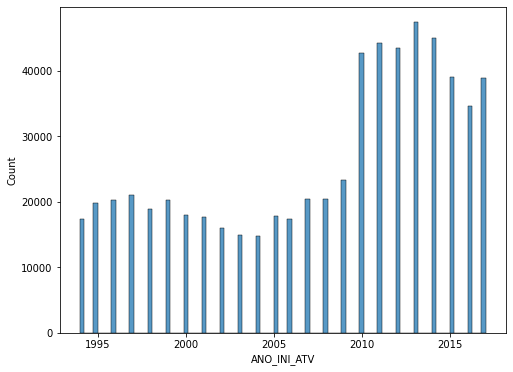

In [ ]:
#Visualizar Quantidade de Empresas Abertas Ano a Ano Periodo 02
plt.figure(figsize=(8,6))
sns.histplot(data=df_Per02, x='ANO_INI_ATV')

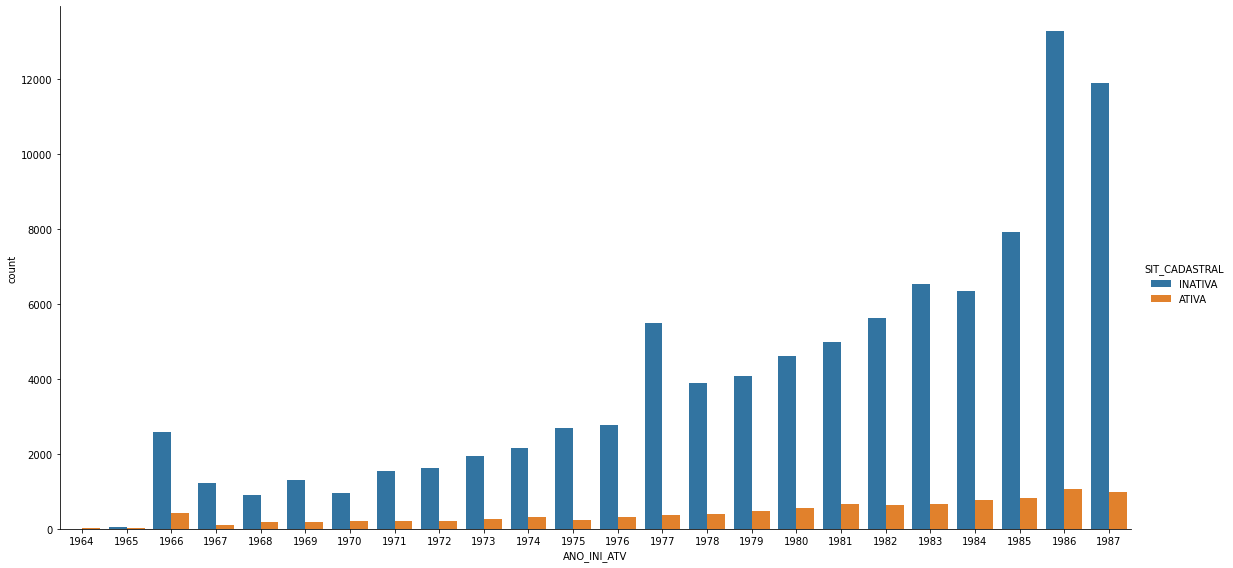

In [ ]:
# Distribuição do SIT_CADASTRAL dividido por ANO_INI_ATV. Periodo 01
sns.factorplot('ANO_INI_ATV', data=df_Per01, hue='SIT_CADASTRAL', kind='count', size=8, aspect=2)
plt.show()


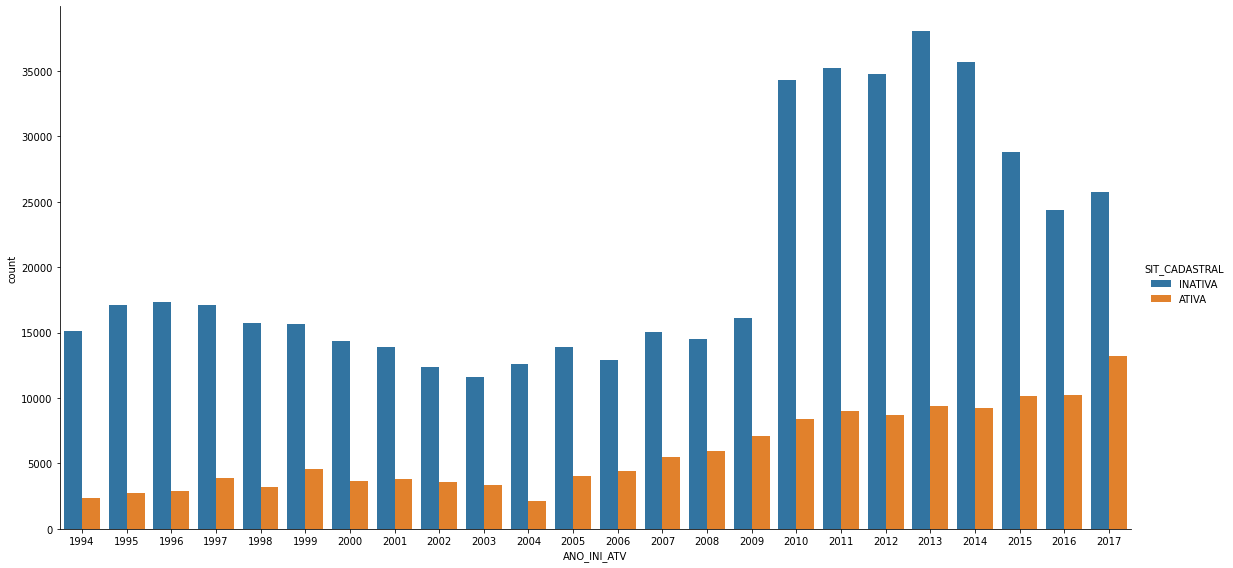

In [ ]:
# Distribuição do SIT_CADASTRAL dividido por ANO_INI_ATV. Periodo 02
sns.factorplot('ANO_INI_ATV', data=df_Per02, hue='SIT_CADASTRAL', kind='count', size=8, aspect=2)
plt.show()

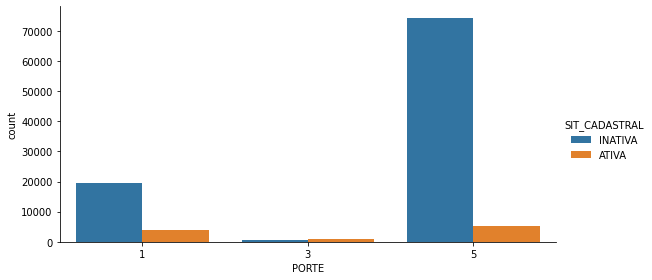

In [ ]:
# Distribuição do SIT_CADASTRAL dividido por ANO_INI_ATV Periodo 01
sns.factorplot('PORTE', data=df_Per01, hue='SIT_CADASTRAL', kind='count', size=4, aspect=2)
plt.show()

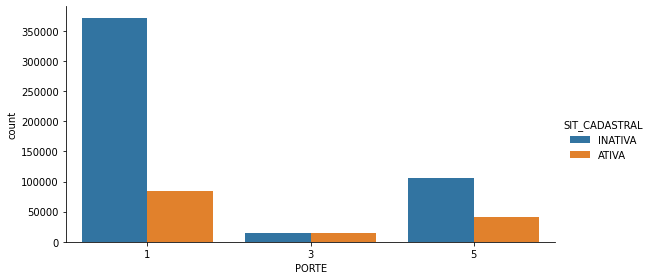

In [ ]:
# Distribuição do SIT_CADASTRAL dividido por ANO_INI_ATV Periodo 02
sns.factorplot('PORTE', data=df_Per02, hue='SIT_CADASTRAL', kind='count', size=4, aspect=2)
plt.show()

In [ ]:
#Importação e Analise da Tabela CNAE 2.0
cnae = pd.read_csv('/content/drive/MyDrive/FURG-TCC/TCC - DADOS E ANALISE/DADOS/CNAE.csv', sep=';', encoding='unicode_escape')
cnae.head()

,CNAE,Atividade Econômica,Cód. Setor,Setor
0,111301,Cultivo de arroz,1.0000,"AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS"
1,111302,Cultivo de milho,1.0000,"AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS"
2,111303,Cultivo de trigo,1.0000,"AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS"
3,111399,Cultivo de outros cereais não especificados an...,1.0000,"AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS"
4,112101,Cultivo de algodão herbáceo,1.0000,"AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS"


In [ ]:
#Analisar dados de Setor da Tabela CNAE
cnae['Cód. Setor'].unique()

array([ 1.,  2.,  3.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 35., 36., 37., 38., 39., 41., 42.,
       43., 45., 46., 47., 49., 50., 51., 52., 53., 55., 56., 58., 59.,
       60., 61., 62., 63., 64., 65., 66., 68., 69., 70., 71., 72., 73.,
       74., 75., 77., 78., 79., 80., 81., 82., 84., 85., 86., 87., 88.,
       90., 91., 92., 93., 94., 95., 96., 97., 99., nan])

In [ ]:
cnae.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CNAE                 1477 non-null   object 
 1   Atividade Econômica  1507 non-null   object 
 2   Cód. Setor           1464 non-null   float64
 3   Setor                1464 non-null   object 
dtypes: float64(1), object(3)
memory usage: 72.7+ KB


In [ ]:
cnae.head()

,CNAE,Atividade Econômica,Cód. Setor,Setor
0,111301,Cultivo de arroz,1.0000,"AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS"
1,111302,Cultivo de milho,1.0000,"AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS"
2,111303,Cultivo de trigo,1.0000,"AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS"
3,111399,Cultivo de outros cereais não especificados an...,1.0000,"AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS"
4,112101,Cultivo de algodão herbáceo,1.0000,"AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS"


In [ ]:
#Excluir CNAES vazios
cnae = cnae.dropna()

In [ ]:
cnae.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 0 to 1463
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CNAE                 1464 non-null   object 
 1   Atividade Econômica  1464 non-null   object 
 2   Cód. Setor           1464 non-null   float64
 3   Setor                1464 non-null   object 
dtypes: float64(1), object(3)
memory usage: 57.2+ KB


In [ ]:
# Mudar variavel Setor para Inteiro
cnae['Cód. Setor'] = cnae['Cód. Setor'].astype(int)

In [ ]:
cnae.head()

,CNAE,Atividade Econômica,Cód. Setor,Setor
0,111301,Cultivo de arroz,1,"AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS"
1,111302,Cultivo de milho,1,"AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS"
2,111303,Cultivo de trigo,1,"AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS"
3,111399,Cultivo de outros cereais não especificados an...,1,"AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS"
4,112101,Cultivo de algodão herbáceo,1,"AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS"


In [ ]:
cnae['Cód. Setor'].unique()

array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36,
       37, 38, 39, 41, 42, 43, 45, 46, 47, 49, 50, 51, 52, 53, 55, 56, 58,
       59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 77,
       78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96,
       97, 99])

In [ ]:
#RENOMEAR COLUNA CNPJ BASICO
cnae = cnae.rename(columns={'CNAE': 'CNAE_FISCAL'})

In [ ]:
cnae.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 0 to 1463
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CNAE_FISCAL          1464 non-null   object
 1   Atividade Econômica  1464 non-null   object
 2   Cód. Setor           1464 non-null   int64 
 3   Setor                1464 non-null   object
dtypes: int64(1), object(3)
memory usage: 57.2+ KB


In [ ]:
# Mudar variavel CNAE para Inteiro
cnae['CNAE_FISCAL'] = cnae['CNAE_FISCAL'].astype(int)

In [ ]:
df_Per01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104583 entries, 79 to 984084
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   NOME           104583 non-null  object 
 1   DESC_NATJU     104583 non-null  object 
 2   PORTE          104583 non-null  float64
 3   IDE_MAT_FIL    104583 non-null  int64  
 4   SIT_CADASTRAL  104583 non-null  object 
 5   MOT_SIT_CADAS  104583 non-null  int64  
 6   ANO_INI_ATV    104583 non-null  int64  
 7   CNAE_FISCAL    104583 non-null  int64  
 8   DESC_CNAE      104583 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 8.0+ MB


In [ ]:
#Cruzar Tabela Cnae Periodo 01
df_Per01 = pd.merge(df_Per01,cnae,on='CNAE_FISCAL')

In [ ]:
# VERIFICAR DADOS DUPLICADOS
duplicados = df_Per01[df_Per01.duplicated(keep='first')]
print(duplicados)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#Visualizar Tabela Cnae/Setor Periodo 01
df_Per01['Setor'].value_counts()

COMÉRCIO VAREJISTA                                                                                                           61032
ALIMENTAÇÃO                                                                                                                   7965
COMÉRCIO POR ATACADO, EXCETO VEÍCULOS AUTOMOTORES E MOTOCICLETAS                                                              6397
ATIVIDADES DE ORGANIZAÇÕES ASSOCIATIVAS                                                                                       3821
COMÉRCIO E REPARAÇÃO DE VEÍCULOS AUTOMOTORES E MOTOCICLETAS                                                                   3053
FABRICAÇÃO DE PRODUTOS ALIMENTÍCIOS                                                                                           2328
SELEÇÃO, AGENCIAMENTO E LOCAÇÃO DE MÃO-DE-OBRA                                                                                1865
REPARAÇÃO E MANUTENÇÃO DE EQUIPAMENTOS DE INFORMÁTICA E COMUNICAÇÃO E DE OBJETOS PE

In [ ]:
#Visualizar Tabela Cnae/Setor Periodo 01 por Situação Cadastral
pd.crosstab(df_Per01["Setor"],df_Per01['SIT_CADASTRAL'])

SIT_CADASTRAL,ATIVA,INATIVA
Setor,,
"ADMINISTRAÇÃO PÚBLICA, DEFESA E SEGURIDADE SOCIAL",21,49
"AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS",230,464
"AGÊNCIAS DE VIAGENS, OPERADORES TURÍSTICOS E SERVIÇOS DE RESERVAS",58,264
ALIMENTAÇÃO,183,7782
ALOJAMENTO,119,366
ALUGUÉIS NÃO-IMOBILIÁRIOS E GESTÃO DE ATIVOS INTANGÍVEIS NÃO-FINANCEIROS,81,479
ARMAZENAMENTO E ATIVIDADES AUXILIARES DOS TRANSPORTES,40,147
"ATIVIDADES ARTÍSTICAS, CRIATIVAS E DE ESPETÁCULOS",27,73
"ATIVIDADES AUXILIARES DOS SERVIÇOS FINANCEIROS, SEGUROS, PREVIDÊNCIA COMPLEMENTAR E PLANOS DE SAÚDE",30,134


In [ ]:
#Visualizar NATUREZA JURIDICA Periodo 01 por Situação Cadastral
pd.crosstab(df_Per01["DESC_NATJU"],df_Per01['SIT_CADASTRAL'])

SIT_CADASTRAL,ATIVA,INATIVA
DESC_NATJU,,
Associação Privada,1563,4054
Clube/Fundo de Investimento,6,4
Condomínio Edilício,1021,7
Cooperativa,66,159
Empresa Individual Imobiliária,35,2122
Empresa Individual de Responsabilidade Limitada (de Natureza Empresária),260,119
Empresa Individual de Responsabilidade Limitada (de Natureza Simples),3,1
Empresário (Individual),2103,61460
"Estabelecimento, no Brasil, de Sociedade Estrangeira",3,3


In [ ]:
#Cruzar Tabela Cnae Periodo 02
df_Per02 = pd.merge(df_Per02,cnae,on='CNAE_FISCAL')

In [ ]:
#Visualizar Tabela Cnae/Setor Periodo 02 por Situação Cadastral
pd.crosstab(df_Per02["Setor"],df_Per02['SIT_CADASTRAL'])

SIT_CADASTRAL,ATIVA,INATIVA
Setor,,
"ADMINISTRAÇÃO PÚBLICA, DEFESA E SEGURIDADE SOCIAL",55,78
"AGRICULTURA, PECUÁRIA E SERVIÇOS RELACIONADOS",836,1499
"AGÊNCIAS DE VIAGENS, OPERADORES TURÍSTICOS E SERVIÇOS DE RESERVAS",754,2753
ALIMENTAÇÃO,5352,39217
ALOJAMENTO,1102,1889
ALUGUÉIS NÃO-IMOBILIÁRIOS E GESTÃO DE ATIVOS INTANGÍVEIS NÃO-FINANCEIROS,2908,7317
ARMAZENAMENTO E ATIVIDADES AUXILIARES DOS TRANSPORTES,1093,2590
"ATIVIDADES ARTÍSTICAS, CRIATIVAS E DE ESPETÁCULOS",908,3584
"ATIVIDADES AUXILIARES DOS SERVIÇOS FINANCEIROS, SEGUROS, PREVIDÊNCIA COMPLEMENTAR E PLANOS DE SAÚDE",1194,1787


In [ ]:
#Visualizar NATUREZA JURIDICA Periodo 02 por Situação Cadastral
pd.crosstab(df_Per02["DESC_NATJU"],df_Per02['SIT_CADASTRAL'])

SIT_CADASTRAL,ATIVA,INATIVA
DESC_NATJU,,
Associação Privada,17209,20749
Clube/Fundo de Investimento,2,17
Condomínio Edilício,4863,25
Consórcio de Empregadores,5,0
Consórcio de Sociedades,327,115
Cooperativa,510,1232
Cooperativas de Consumo,1,0
Empresa Individual Imobiliária,70,4614
Empresa Individual de Responsabilidade Limitada (de Natureza Empresária),15264,11431
